In [13]:
import pandas as pd
from google.colab import files

uploaded = files.upload()

Saving asian_bird_species_ml_dataset.csv to asian_bird_species_ml_dataset (1).csv


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

In [15]:
import pandas as pd
df = pd.read_csv('asian_bird_species_ml_dataset.csv')
print("DataFrame 'df' has been defined. Displaying the first 5 rows:")
display(df.head())

DataFrame 'df' has been defined. Displaying the first 5 rows:


,Country,Temperature,Precipitation,Elevation,Urbanization,Water_Proximity,Bird_Species
0,Thailand,18.971004,2708.280873,3233.101758,0.358335,0.700935,Kingfisher
1,Singapore,19.425109,1102.203410,1015.284313,0.912892,0.194274,Sparrow
2,Cambodia,32.553642,550.653997,983.229757,0.565688,0.447201,Pigeon
3,Sri Lanka,22.612047,1528.141108,1611.057594,0.182672,0.829821,Kingfisher
4,Nepal,5.985400,519.078577,3578.571190,0.139599,0.654725,Eagle


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          1000 non-null   object 
 1   Temperature      1000 non-null   float64
 2   Precipitation    1000 non-null   float64
 3   Elevation        1000 non-null   float64
 4   Urbanization     1000 non-null   float64
 5   Water_Proximity  1000 non-null   float64
 6   Bird_Species     1000 non-null   object 
dtypes: float64(5), object(2)
memory usage: 54.8+ KB


In [17]:
df.isnull().sum()

,0
Country,0
Temperature,0
Precipitation,0
Elevation,0
Urbanization,0
Water_Proximity,0
Bird_Species,0


In [18]:
import numpy as np
print("Missing values per column:")
display(df.isnull().sum())
print("\nOutlier Analysis using IQR method:")
numerical_cols = df.select_dtypes(include=np.number).columns

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    if not outliers.empty:
        print(f"Column '{col}': {len(outliers)} outliers detected.")
    else:
        print(f"Column '{col}': No outliers detected.")

Missing values per column:


,0
Country,0
Temperature,0
Precipitation,0
Elevation,0
Urbanization,0
Water_Proximity,0
Bird_Species,0



Outlier Analysis using IQR method:
Column 'Temperature': No outliers detected.
Column 'Precipitation': No outliers detected.
Column 'Elevation': No outliers detected.
Column 'Urbanization': No outliers detected.
Column 'Water_Proximity': No outliers detected.


In [19]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
X = df.drop('Bird_Species', axis=1)
y = df['Bird_Species']

print("Input features (X) shape:", X.shape)
print("Output target (y) shape:", y.shape)
print("\nFirst 5 rows of X:")
display(X.head())
print("\nFirst 5 rows of y:")
display(y.head())

le = LabelEncoder()
y_encoded = le.fit_transform(y)

y_encoded_df = pd.DataFrame(y_encoded, columns=['Bird_Species_Encoded'], index=X.index)

df_corr = pd.concat([X, y_encoded_df], axis=1)
df_corr_numerical_only = df_corr.select_dtypes(include=['number'])

corr_matrix_full = df_corr_numerical_only.corr()

target_correlations = corr_matrix_full['Bird_Species_Encoded'].drop('Bird_Species_Encoded')

sorted_target_correlations = target_correlations.abs().sort_values(ascending=False)

print("\nCorrelations between 'Bird_Species' (encoded) and other features (sorted by absolute value):")
display(sorted_target_correlations)

Input features (X) shape: (1000, 6)
Output target (y) shape: (1000,)

First 5 rows of X:


,Country,Temperature,Precipitation,Elevation,Urbanization,Water_Proximity
0,Thailand,18.971004,2708.280873,3233.101758,0.358335,0.700935
1,Singapore,19.425109,1102.203410,1015.284313,0.912892,0.194274
2,Cambodia,32.553642,550.653997,983.229757,0.565688,0.447201
3,Sri Lanka,22.612047,1528.141108,1611.057594,0.182672,0.829821
4,Nepal,5.985400,519.078577,3578.571190,0.139599,0.654725



First 5 rows of y:


,Bird_Species
0,Kingfisher
1,Sparrow
2,Pigeon
3,Kingfisher
4,Eagle



Correlations between 'Bird_Species' (encoded) and other features (sorted by absolute value):


,Bird_Species_Encoded
Temperature,0.530038
Precipitation,0.284828
Urbanization,0.283437
Water_Proximity,0.107855
Elevation,0.042048


In [20]:
from sklearn.preprocessing import OneHotEncoder

categorical_cols = X.select_dtypes(include='object').columns

if not categorical_cols.empty:
    print(f"Categorical columns identified for one-hot encoding: {list(categorical_cols)}")

    one_hot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

    encoded_features = one_hot_encoder.fit_transform(X[categorical_cols])
    encoded_feature_names = one_hot_encoder.get_feature_names_out(categorical_cols)
    encoded_df = pd.DataFrame(encoded_features, columns=encoded_feature_names, index=X.index)

    X = X.drop(columns=categorical_cols)

    X = pd.concat([X, encoded_df], axis=1)
    print("Categorical features successfully one-hot encoded and concatenated to X.")
else:
    print("No categorical columns found in X for one-hot encoding.")

print("\nUpdated X head after one-hot encoding:")
display(X.head())
print("\nUpdated X info after one-hot encoding:")
X.info()

Categorical columns identified for one-hot encoding: ['Country']
Categorical features successfully one-hot encoded and concatenated to X.

Updated X head after one-hot encoding:


,Temperature,Precipitation,Elevation,Urbanization,Water_Proximity,Country_Afghanistan,Country_Bangladesh,Country_Bhutan,Country_Cambodia,Country_China,...,Country_Mongolia,Country_Myanmar,Country_Nepal,Country_Pakistan,Country_Philippines,Country_Singapore,Country_South Korea,Country_Sri Lanka,Country_Thailand,Country_Vietnam
0,18.971004,2708.280873,3233.101758,0.358335,0.700935,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,19.425109,1102.203410,1015.284313,0.912892,0.194274,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,32.553642,550.653997,983.229757,0.565688,0.447201,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,22.612047,1528.141108,1611.057594,0.182672,0.829821,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5.985400,519.078577,3578.571190,0.139599,0.654725,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



Updated X info after one-hot encoding:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Temperature          1000 non-null   float64
 1   Precipitation        1000 non-null   float64
 2   Elevation            1000 non-null   float64
 3   Urbanization         1000 non-null   float64
 4   Water_Proximity      1000 non-null   float64
 5   Country_Afghanistan  1000 non-null   float64
 6   Country_Bangladesh   1000 non-null   float64
 7   Country_Bhutan       1000 non-null   float64
 8   Country_Cambodia     1000 non-null   float64
 9   Country_China        1000 non-null   float64
 10  Country_India        1000 non-null   float64
 11  Country_Indonesia    1000 non-null   float64
 12  Country_Japan        1000 non-null   float64
 13  Country_Laos         1000 non-null   float64
 14  Country_Malaysia     1000 non-null   float64
 15 

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train_encoded:", y_train_encoded.shape)
print("Shape of y_test_encoded:", y_test_encoded.shape)

Shape of X_train: (800, 25)
Shape of X_test: (200, 25)
Shape of y_train_encoded: (800,)
Shape of y_test_encoded: (200,)


In [22]:
print("Full Correlation Matrix:")
display(corr_matrix_full)

print("\nCorrelations with 'Bird_Species' (encoded), sorted by absolute value:")
display(sorted_target_correlations)

Full Correlation Matrix:


,Temperature,Precipitation,Elevation,Urbanization,Water_Proximity,Bird_Species_Encoded
Temperature,1.000000,0.022283,0.010251,0.025253,0.022838,0.530038
Precipitation,0.022283,1.000000,-0.046999,0.062899,-0.023812,-0.284828
Elevation,0.010251,-0.046999,1.000000,0.018977,0.003082,-0.042048
Urbanization,0.025253,0.062899,0.018977,1.000000,-0.026522,0.283437
Water_Proximity,0.022838,-0.023812,0.003082,-0.026522,1.000000,0.107855
Bird_Species_Encoded,0.530038,-0.284828,-0.042048,0.283437,0.107855,1.000000



Correlations with 'Bird_Species' (encoded), sorted by absolute value:


,Bird_Species_Encoded
Temperature,0.530038
Precipitation,0.284828
Urbanization,0.283437
Water_Proximity,0.107855
Elevation,0.042048


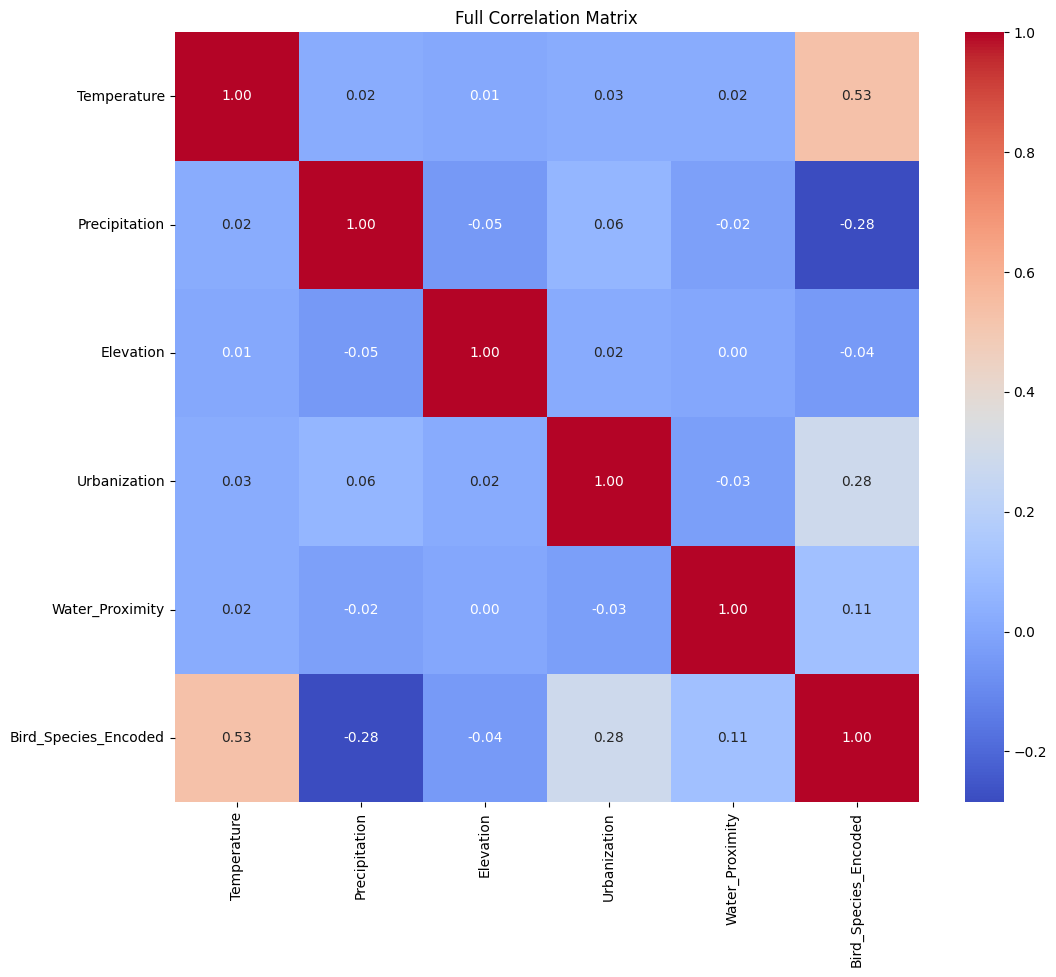

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_full, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Full Correlation Matrix')
plt.show()

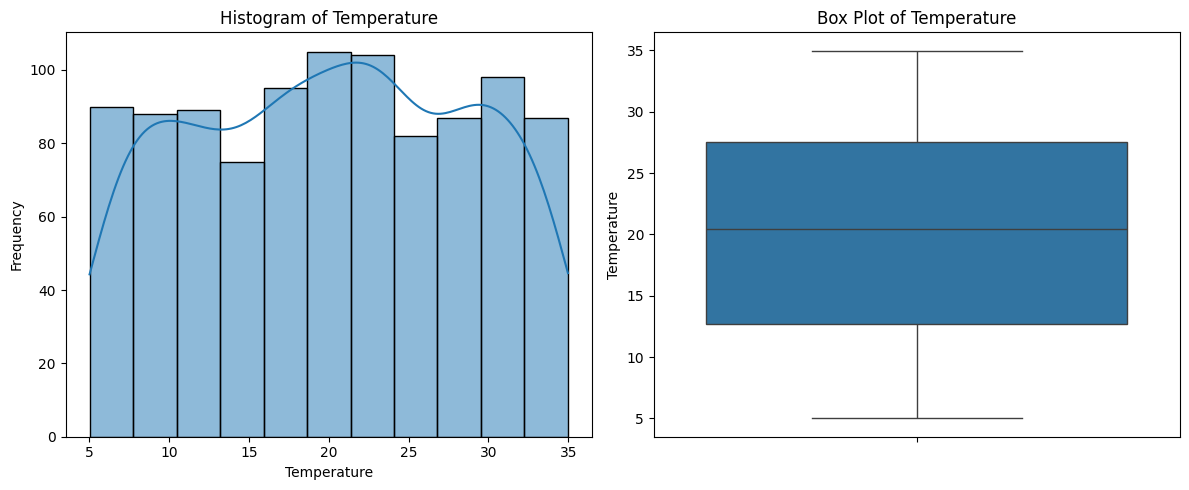

IQR for 'Temperature': 14.83


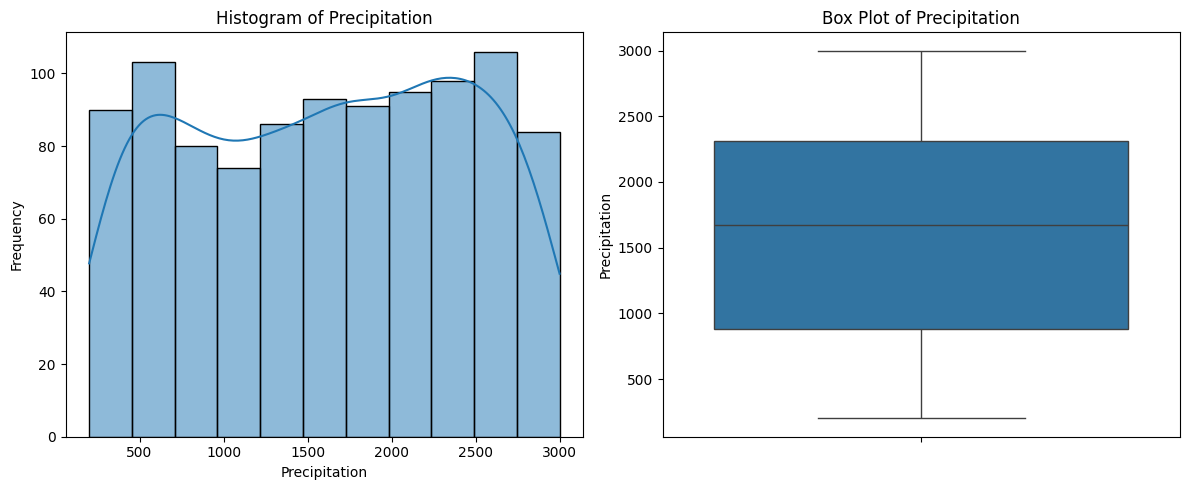

IQR for 'Precipitation': 1431.41


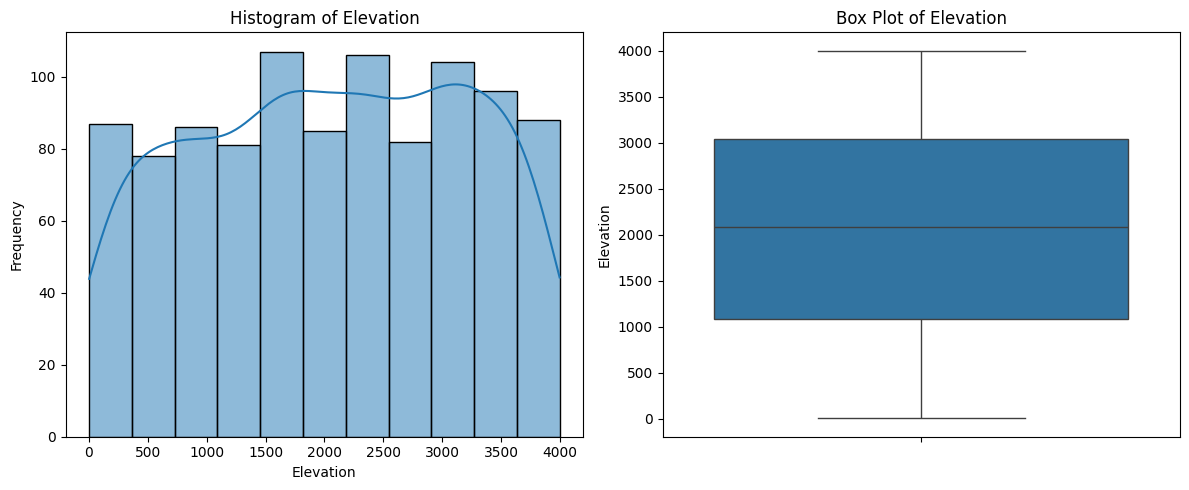

IQR for 'Elevation': 1947.37


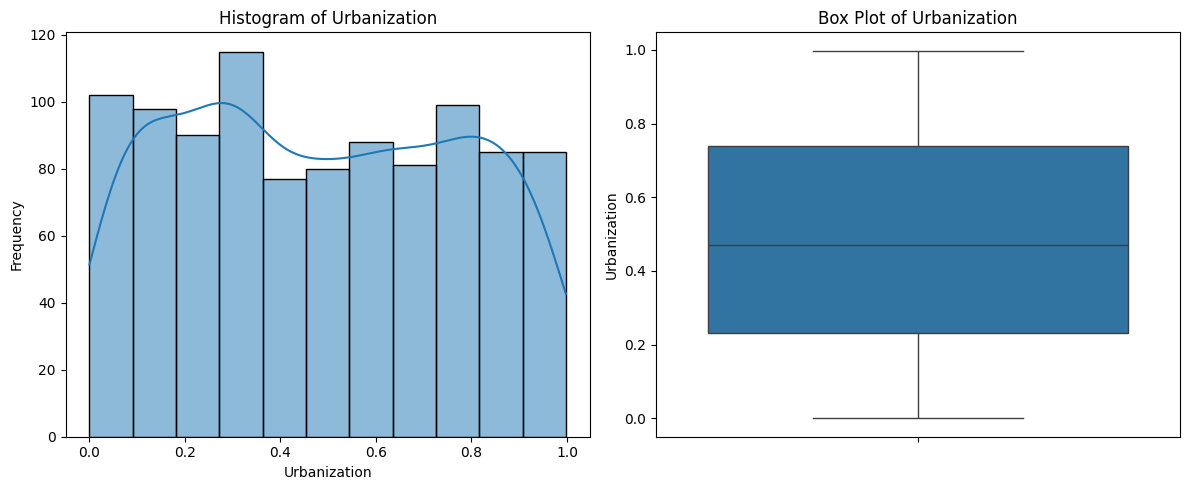

IQR for 'Urbanization': 0.51


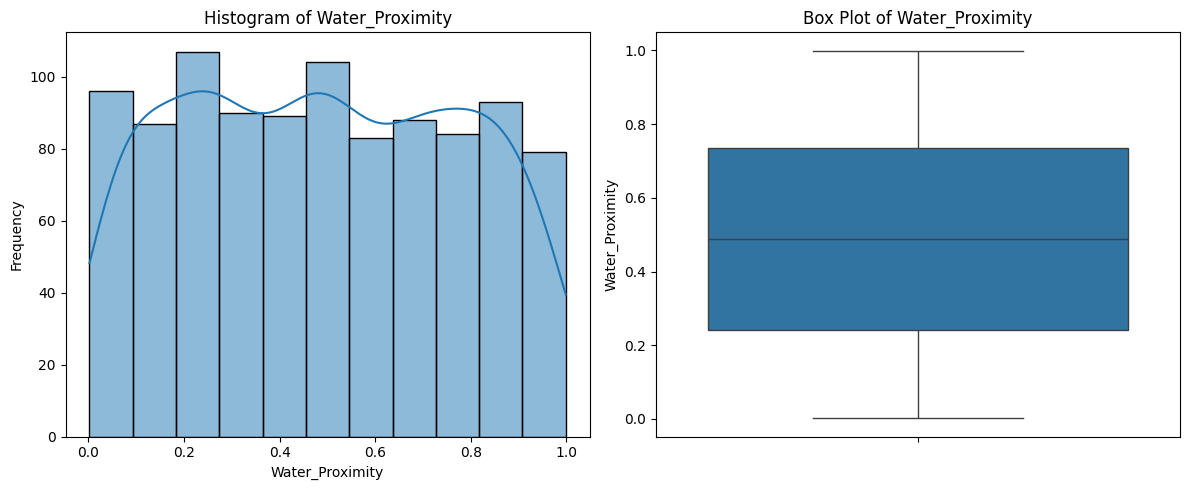

IQR for 'Water_Proximity': 0.49


In [25]:
numerical_cols_df = df.select_dtypes(include=['number']).columns

for col in numerical_cols_df:
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)

    plt.tight_layout()
    plt.show()

    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    print(f"IQR for '{col}': {IQR:.2f}")

Class distribution before SMOTE:


,count
0,103
1,165
2,11
3,20
4,100
5,44
6,72
7,93
8,167
9,25



Shape of X_train after SMOTE: (1670, 25)
Shape of y_train after SMOTE: (1670,)

Class distribution after SMOTE:


,count
0,167
1,167
2,167
3,167
4,167
5,167
6,167
7,167
8,167
9,167


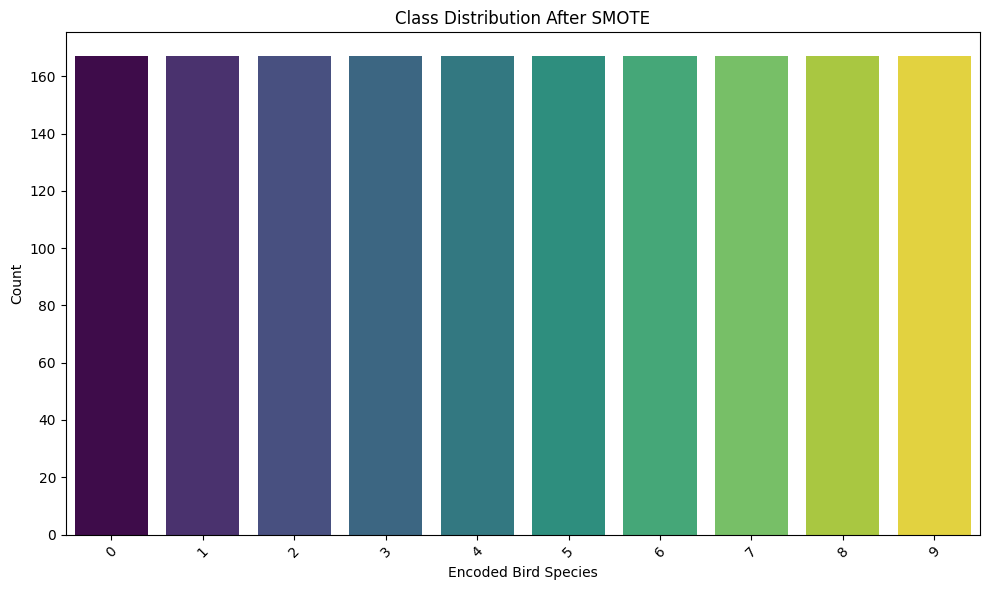

In [26]:
from imblearn.over_sampling import SMOTE
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Before SMOTE
print("Class distribution before SMOTE:")
display(pd.Series(y_train_encoded).value_counts().sort_index())

#  SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train_encoded)

print("\nShape of X_train after SMOTE:", X_train_resampled.shape)
print("Shape of y_train after SMOTE:", y_train_resampled.shape)

# After SMOTE
print("\nClass distribution after SMOTE:")
class_distribution_after_smote = pd.Series(y_train_resampled).value_counts().sort_index()
display(class_distribution_after_smote)

# Visualize class distribution after SMOTE
plt.figure(figsize=(10, 6))
sns.barplot(x=class_distribution_after_smote.index, y=class_distribution_after_smote.values, hue=class_distribution_after_smote.index, palette='viridis', legend=False)
plt.title('Class Distribution After SMOTE')
plt.xlabel('Encoded Bird Species')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [27]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(random_state=42)
print("RandomForestClassifier initialized successfully.")

RandomForestClassifier initialized successfully.


In [28]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [10, 20, None],
    'criterion': ['gini', 'entropy']
}
print("Hyperparameter grid 'param_grid' defined successfully.")

Hyperparameter grid 'param_grid' defined successfully.


In [29]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
print("GridSearchCV object 'grid_search' initialized successfully.")

GridSearchCV object 'grid_search' initialized successfully.


In [30]:
print("Starting GridSearchCV training...")
grid_search.fit(X_train_resampled, y_train_resampled)
print("GridSearchCV training completed.")


Starting GridSearchCV training...
GridSearchCV training completed.


In [31]:
print("Best parameters found by GridSearchCV:")
display(grid_search.best_params_)
print("\nBest accuracy score achieved by GridSearchCV:")
display(grid_search.best_score_)

Best parameters found by GridSearchCV:


{'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'sqrt',
 'n_estimators': 100}


Best accuracy score achieved by GridSearchCV:


np.float64(0.9826347305389221)